In [1]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
RESOLUTION = 150
BATCH_SIZE = 20

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
        'data/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

val_generator = val_datagen.flow_from_directory(
        'data/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 782 images belonging to 3 classes.
Found 332 images belonging to 3 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        'data/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 1114 images belonging to 3 classes.


In [4]:
test_generator.filenames

['cubism/cubismo_1.jpg',
 'cubism/cubismo_10.jpg',
 'cubism/cubismo_100.jpg',
 'cubism/cubismo_101.jpg',
 'cubism/cubismo_102.jpg',
 'cubism/cubismo_103.jpg',
 'cubism/cubismo_104.jpg',
 'cubism/cubismo_105.jpg',
 'cubism/cubismo_106.jpg',
 'cubism/cubismo_107.jpg',
 'cubism/cubismo_108.jpg',
 'cubism/cubismo_109.jpg',
 'cubism/cubismo_11.jpg',
 'cubism/cubismo_110.jpg',
 'cubism/cubismo_111.jpg',
 'cubism/cubismo_112.jpg',
 'cubism/cubismo_113.jpg',
 'cubism/cubismo_114.jpg',
 'cubism/cubismo_115.jpg',
 'cubism/cubismo_116.jpg',
 'cubism/cubismo_117.jpg',
 'cubism/cubismo_118.jpg',
 'cubism/cubismo_119.jpg',
 'cubism/cubismo_12.jpg',
 'cubism/cubismo_120.jpg',
 'cubism/cubismo_121.jpg',
 'cubism/cubismo_122.jpg',
 'cubism/cubismo_123.jpg',
 'cubism/cubismo_124.jpg',
 'cubism/cubismo_125.jpg',
 'cubism/cubismo_126.jpg',
 'cubism/cubismo_127.jpg',
 'cubism/cubismo_128.jpg',
 'cubism/cubismo_129.jpg',
 'cubism/cubismo_13.jpg',
 'cubism/cubismo_130.jpg',
 'cubism/cubismo_131.jpg',
 'cubis

In [5]:
conv_base = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights=None)

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# adjust here to 3 class
model.add(Dense(3, activation='softmax'))

# conv_base = VGG16(include_top=False, weights=None, input_shape=(150, 150, 3), classes=3)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 26,522,403
Trainable params: 26,487,971
Non-trainable params: 34,432
_________________________________________________________________


In [7]:
N_TRAIN = 782
N_VAL = 332
history = model.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // BATCH_SIZE),
        epochs=20,
        validation_data=val_generator,
        validation_steps=(N_VAL // BATCH_SIZE) 
        )

Epoch 1/20
39/39 [==============================] - 98s 3s/step - loss: 1.1240 - acc: 0.4179 - val_loss: 0.9795 - val_acc: 0.5090
Epoch 2/20
39/39 [==============================] - 59s 2s/step - loss: 0.9560 - acc: 0.5218 - val_loss: 0.9676 - val_acc: 0.5542
Epoch 3/20
39/39 [==============================] - 56s 1s/step - loss: 0.9298 - acc: 0.5388 - val_loss: 0.9833 - val_acc: 0.5602
Epoch 4/20
39/39 [==============================] - 57s 1s/step - loss: 0.8827 - acc: 0.5683 - val_loss: 0.8921 - val_acc: 0.5602
Epoch 5/20
39/39 [==============================] - 58s 1s/step - loss: 0.8329 - acc: 0.6081 - val_loss: 0.8727 - val_acc: 0.6235
Epoch 6/20
39/39 [==============================] - 59s 2s/step - loss: 0.7811 - acc: 0.6485 - val_loss: 0.8539 - val_acc: 0.6265
Epoch 7/20
39/39 [==============================] - 56s 1s/step - loss: 0.8151 - acc: 0.6334 - val_loss: 0.8253 - val_acc: 0.6114
Epoch 8/20
39/39 [==============================] - 58s 1s/step - loss: 0.7735 - acc: 0.67

## Report

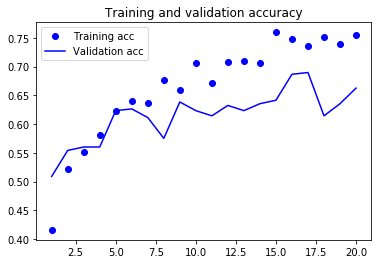

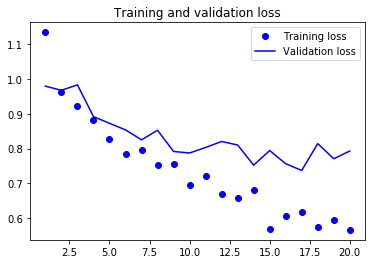

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

In [8]:
# Saving model
model.save('inception_v3_art.h5')

In [35]:
from keras.models import load_model

model = load_model('inception_v3_art.h5')

# Remove dense layers

In [36]:
model.pop()
model.pop()
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
Total params: 21,802,784
Trainable params: 21,768,352
Non-trainable params: 34,432
_________________________________________________________________


In [37]:
Y_pred = model.predict_generator(test_generator)

In [38]:
np.save('features.npy', Y_pred)

In [ ]:
output_file = []
for name, arr_ in zip(test_generator.filenames, Y_pred):
    output_file.append((name, arr_))

In [ ]:
with open('output_features.txt', 'w') as f:
    for i in output_file:
        f.write('{}, {}\n'.format(i[0], i[1]))